<a href="https://colab.research.google.com/github/NMThanh123/AI_Report/blob/main/AI_Report_Predict_future_fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict 5 kind of flowers

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def save_data(root_folder):

    dest_size = (224, 224)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(224, 224)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix_future_fingerprint.data', 'wb')
    # dump information to that file
    pickle.dump((images,labels), file)
    # close the file
    file.close()

save_data('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/data_fingerprint')

Bắt đầu xử lý ảnh...
Folder = designer
Folder = doctor
Folder = engineer
Folder = farmer
Folder = singer
Folder = teacher
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix_future_fingerprint.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(1458, 224, 224, 3)
(1458, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 100)
X = X_test
X_train.shape

(1166, 224, 224, 3)

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
h = model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
37/37 [==============================] - 53s 115ms/step - loss: 1.7579 - accuracy: 0.2882
Epoch 2/30
37/37 [==============================] - 4s 114ms/step - loss: 1.7408 - accuracy: 0.3036
Epoch 3/30
37/37 [==============================] - 4s 113ms/step - loss: 1.7421 - accuracy: 0.3036
Epoch 4/30
37/37 [==============================] - 4s 115ms/step - loss: 1.7425 - accuracy: 0.3036
Epoch 5/30
37/37 [==============================] - 4s 116ms/step - loss: 1.7398 - accuracy: 0.3036
Epoch 6/30
37/37 [==============================] - 4s 115ms/step - loss: 1.7374 - accuracy: 0.3036
Epoch 7/30
37/37 [==============================] - 4s 116ms/step - loss: 1.7337 - accuracy: 0.3036
Epoch 8/30
37/37 [==============================] - 4s 119ms/step - loss: 1.7326 - accuracy: 0.3036
Epoch 9/30
37/37 [==============================] - 4s 116ms/step - loss: 1.7263 - accuracy: 0.3036
Epoch 10/30
37/37 [==============================] - 4s 115ms/step - loss: 1.7223 - accuracy: 0.303

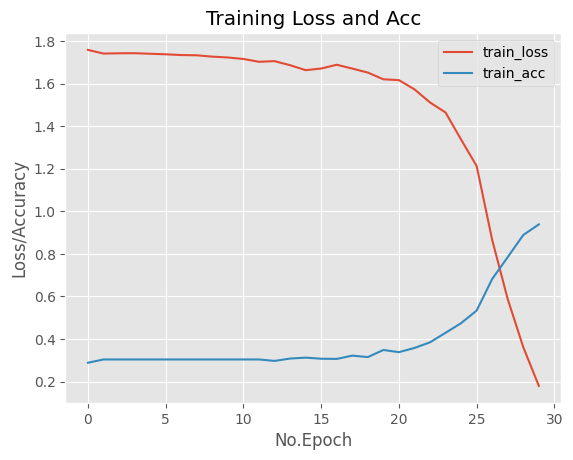

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), h.history["accuracy"], label="train_acc")
plt.title("Training Loss and Acc")
plt.xlabel("No.Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Report/Model_AI/model_fingerprint.h5')